# Fitting Univariate Distributions
___

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import data

In [5]:
losses = pd.read_excel('losses.xlsx').set_index('Date').loc[:, 0] / 1e6

## Fit Normal and Student's $t$ distributions to returns

Compute the MLE for `r`. Use `scipy.stats.rv_continuous.fit` for both the `norm` and `t`  distributions.  
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html>

In [6]:
mu, sigma = stats.norm.fit(losses)
nu, loc, scale = stats.t.fit(losses)
print(f"MLE Norm distribution: location={mu:.3f}, scale={sigma:.3f}")
print(f"MLE t distribution   : location={loc:.3f}, scale={scale:.3f}, shape={nu:.2f}")

MLE Norm distribution: location=-0.036, scale=0.730
MLE t distribution   : location=-0.060, scale=0.468, shape=3.30


Create an histogram of the returns and overlay the pdf of the Normal and $t$ distributions with the MLE of the parameters.  
The `hist()` function needs the arg `density=True` to be normalized and share the y axis with a pdf.

In [14]:
losses.max()

5.826665911891337

/Users/eandre/opt/anaconda3/envs/ASTAT/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


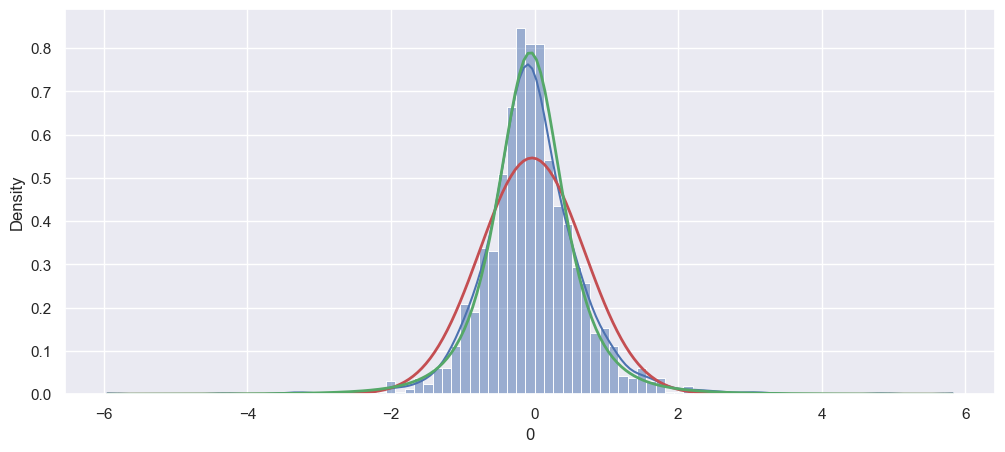

In [23]:
x = np.linspace(losses.min(), losses.max(), 200)
pdf_norm = stats.norm.pdf(x, loc=mu, scale=sigma)
pdf_t = stats.t.pdf(x, df=nu, loc=loc, scale=scale)

fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(losses, kde=True, ax=ax, stat='density')
ax.plot(x, pdf_norm, c='r', lw=2)
ax.plot(x, pdf_t, c='g', lw=2)


zoom on the right tail

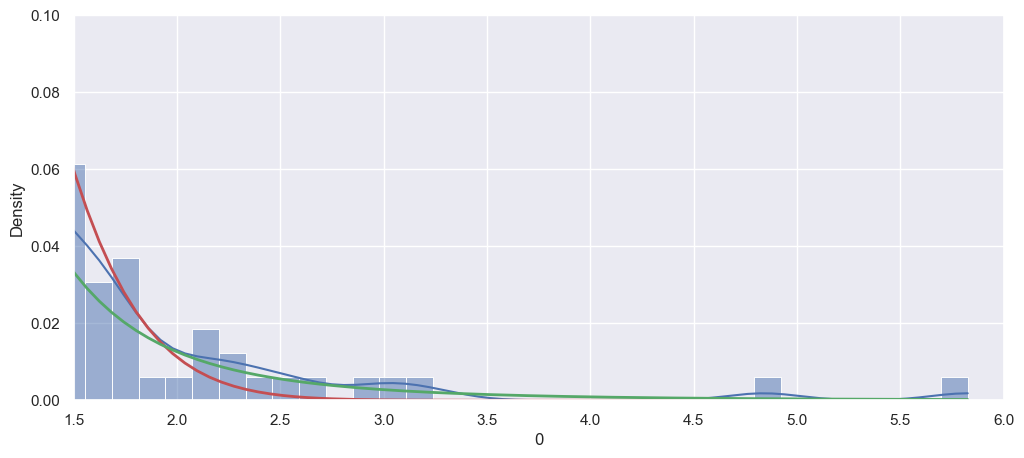

In [26]:
ax.set_xlim((1.5, 6))
ax.set_ylim((0, 0.1))
fig

## Comparing the models using Information Criteria (IC)

### Functions that compute AIC and BIC

In [27]:
def AIC(nll, nparams):
    """
    Compute the Akaike Information Criterion
    Parameters:
      nll : negative maximized loglikelihood of the sample
      nparams : number of free parameters in the model
    """
    aic = 2 * nll + 2 * nparams
    return aic

def BIC(nll, nparams, n):
    """
    Compute the Bayesian Information Criterion
    Parameters:
      nll : negative maximized loglikelihood of the sample
      nparams : number of free parameters in the model
      n : sample size
    """
    bic = 2 * nll + np.log(n) * nparams
    return bic

### Compute and display the AIC and BIC values for the two models

1. Compute the negative log likelihood using the `nnlf( )` method.\
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.nnlf.html>

In [29]:
nll_norm = stats.norm.nnlf([mu, sigma], losses)
nll_t = stats.t.nnlf([nu, loc, scale], losses)
print("Negative log likelihood for")
print(f"- Normal distribution     : {nll_norm:.2f}")
print(f"- Student's t distribution: {nll_t:.2f}")

Negative log likelihood for
- Normal distribution     : 1389.64
- Student's t distribution: 1234.76


2. Store the additional parameters

In [30]:
n = len(losses)
nparams_norm = 2
nparams_t = 3

3. Compute the IC values and store in a list.

In [31]:
norm_IC_values = [AIC(nll_norm, nparams_norm), BIC(nll_norm, nparams_norm, n)]
t_IC_values = [AIC(nll_t, nparams_t), BIC(nll_t, nparams_t, n)]

4. Display the IC values using a DataFrame

In [32]:
IC = pd.DataFrame({'norm': norm_IC_values, 't': t_IC_values},
                  index=['AIC', 'BIC'])
IC.round(1)

,norm,t
AIC,2783.3,2475.5
BIC,2793.6,2490.9
